In [19]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re

In [20]:
url = 'https://www.j-archive.com/listseasons.php'
r = requests.get(url)
soup = BeautifulSoup(r.content)
soup.prettify()

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.1//EN" "http://www.w3.org/TR/xhtml11/DTD/xhtml11.dtd">\n<html xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <title>\n   J! Archive - Season list\n  </title>\n  <link href="http://www.j-archive.com/styles.css" rel="styleSheet" type="text/css"/>\n  <link href="http://www.j-archive.com/favicon.ico" rel="shortcut icon"/>\n </head>\n <body>\n  <div id="navbar">\n   <span id="navbarlogo">\n    <a href="http://www.j-archive.com">\n     <img alt="J! Archive" height="22" src="http://www.j-archive.com/j-a.gif" width="100"/>\n    </a>\n   </span>\n   <span id="navbartext">\n    <a href="http://www.j-archive.com/showseason.php?season=35">\n     [current season]\n    </a>\n    <a href="http://www.j-archive.com/showseason.php?season=34">\n     [last season]\n    </a>\n    <a href="http://www.j-archive.com/listseasons.php">\n     [all seasons]\n    </a>\n    <a href="http://www.j-archive.com/listprizes.php">\n     [prizes]\n    </a>\n    <

In [21]:
# Get links for seasons
season_links = []
for link in soup.find_all('a'):
#     print(link.get('href'))
    if 'http' not in link.get('href'):
        season_links.append(link.get('href'))
season_links

['showseason.php?season=35',
 'showseason.php?season=34',
 'showseason.php?season=33',
 'showseason.php?season=32',
 'showseason.php?season=31',
 'showseason.php?season=30',
 'showseason.php?season=29',
 'showseason.php?season=28',
 'showseason.php?season=27',
 'showseason.php?season=26',
 'showseason.php?season=25',
 'showseason.php?season=24',
 'showseason.php?season=23',
 'showseason.php?season=22',
 'showseason.php?season=21',
 'showseason.php?season=20',
 'showseason.php?season=19',
 'showseason.php?season=18',
 'showseason.php?season=17',
 'showseason.php?season=16',
 'showseason.php?season=15',
 'showseason.php?season=14',
 'showseason.php?season=13',
 'showseason.php?season=12',
 'showseason.php?season=11',
 'showseason.php?season=10',
 'showseason.php?season=9',
 'showseason.php?season=8',
 'showseason.php?season=7',
 'showseason.php?season=superjeopardy',
 'showseason.php?season=6',
 'showseason.php?season=5',
 'showseason.php?season=4',
 'showseason.php?season=3',
 'showseas

In [43]:
# season_url = 'https://www.j-archive.com/' + season_links[0]
# print(season_url)
relevant_seasons = []
for i in season_links:
    season_url = 'https://www.j-archive.com/' + i
    r=requests.get(season_url)
    soup = BeautifulSoup(r.content)
    soup.prettify()
    for contestants in soup.find_all('td', {'valign': 'top'}):
        if 'Ken Jennings' in contestants.text or 'James Holzhauer' in contestants.text:
            relevant_seasons.append(i)
relevant_seasons = set(relevant_seasons)

In [83]:
relevant_seasons
# For now just take season games
relevant_seasons = ['showseason.php?season=20', 'showseason.php?season=21','showseason.php?season=35']

In [133]:
relevant_episodes = []
for i in relevant_seasons:
    contestant_index = []
    season_url = 'https://www.j-archive.com/' + i
    r=requests.get(season_url)
    soup = BeautifulSoup(r.content)
    soup.prettify()
    for num, td in enumerate(soup.find_all('td', {'valign': 'top'})):
        if ('Ken Jennings game' in td.text) or ('James Holzhauer game' in td.text):
#         if ('James Holzhauer game' in td.text):
            contestant_index.append(num)
    link_index = [x - 2 for x in contestant_index]  
    for num, contestants in enumerate(soup.find_all('td', {'valign': 'top'})):
        if num in link_index:
            relevant_episodes.append(contestants.find('a').get('href'))


104

In [189]:
# Get contestant final scores and date
episode_dict = {}
for num, show_url in enumerate(relevant_episodes):
    player_score_dict = {}
    r=requests.get(show_url)
    soup = BeautifulSoup(r.content)
    contestant_names = []
    for i in soup.find_all(class_ = 'score_player_nickname'):
        contestant_names.append(i.text)
    contestant_names = contestant_names[:3]
    contestant_scores = []
    try: 
        contestant_scores.append(soup.find('h3', text = 'Final scores:').find_next(class_='score_positive').text)
        contestant_scores.append(soup.find('h3', text = 'Final scores:').find_next(class_='score_positive').find_next(class_='score_positive').text)
        contestant_scores.append(soup.find('h3', text = 'Final scores:').find_next(class_='score_positive').find_next(class_='score_positive').find_next(class_='score_positive').text)
    except:
        pass
    results_dict = dict(zip(contestant_names, contestant_scores))
    episode_dict[soup.find('h1').text] = results_dict


http://www.j-archive.com/showgame.php?game_id=920
http://www.j-archive.com/showgame.php?game_id=2732
http://www.j-archive.com/showgame.php?game_id=2731
http://www.j-archive.com/showgame.php?game_id=2730
http://www.j-archive.com/showgame.php?game_id=2729
http://www.j-archive.com/showgame.php?game_id=2485
http://www.j-archive.com/showgame.php?game_id=2723
http://www.j-archive.com/showgame.php?game_id=2722
http://www.j-archive.com/showgame.php?game_id=2721
http://www.j-archive.com/showgame.php?game_id=2705
http://www.j-archive.com/showgame.php?game_id=2704
http://www.j-archive.com/showgame.php?game_id=2703
http://www.j-archive.com/showgame.php?game_id=2700
http://www.j-archive.com/showgame.php?game_id=2699
http://www.j-archive.com/showgame.php?game_id=2697
http://www.j-archive.com/showgame.php?game_id=2696
http://www.j-archive.com/showgame.php?game_id=2695
http://www.j-archive.com/showgame.php?game_id=2694
http://www.j-archive.com/showgame.php?game_id=2693
http://www.j-archive.com/showgam

In [275]:
from datetime import datetime

for k,v in episode_dict.items():
    start = k.index(',')+2
    start_date = k[start:]
    start_date = datetime.strptime(start_date, '%B %d, %Y')
#     start_date = start_date.strftime('%Y-%m-%d')


In [285]:
list_records = []
for k,v in episode_dict.items():
    start = k.index(',')+2
    start_date = k[start:]
    start_date = datetime.strptime(start_date, '%B %d, %Y').date()
    if 'Ken' in v:
        record = ['Ken',start_date, int(re.sub('[$,]','',v['Ken']))]
        list_records.append(record)
    elif 'James' in v:
        record = ['James',start_date, int(re.sub('[$,]','',v['James']))]
        list_records.append(record)
    else: 
        pass
list_records


[['Ken', datetime.date(2004, 7, 23), 75000],
 ['Ken', datetime.date(2004, 7, 22), 52000],
 ['Ken', datetime.date(2004, 7, 21), 30000],
 ['Ken', datetime.date(2004, 7, 20), 29200],
 ['Ken', datetime.date(2004, 7, 19), 35000],
 ['Ken', datetime.date(2004, 7, 16), 50000],
 ['Ken', datetime.date(2004, 7, 15), 28000],
 ['Ken', datetime.date(2004, 7, 14), 17500],
 ['Ken', datetime.date(2004, 7, 13), 32000],
 ['Ken', datetime.date(2004, 7, 12), 52000],
 ['Ken', datetime.date(2004, 7, 9), 52000],
 ['Ken', datetime.date(2004, 7, 8), 40000],
 ['Ken', datetime.date(2004, 7, 7), 40000],
 ['Ken', datetime.date(2004, 7, 6), 14000],
 ['Ken', datetime.date(2004, 7, 5), 19600],
 ['Ken', datetime.date(2004, 7, 2), 17600],
 ['Ken', datetime.date(2004, 7, 1), 40000],
 ['Ken', datetime.date(2004, 6, 30), 35000],
 ['Ken', datetime.date(2004, 6, 29), 40000],
 ['Ken', datetime.date(2004, 6, 28), 21000],
 ['Ken', datetime.date(2004, 6, 25), 48801],
 ['Ken', datetime.date(2004, 6, 24), 40000],
 ['Ken', datetime

In [294]:
df = pd.DataFrame(list_records)
df.columns = ['contestant','show_dt','winnings']
first_show = df.groupby('contestant').agg({'show_dt': ['min', 'max']})
first_show.columns = ['show_min', 'show_max']
df = df.merge(first_show, how='inner', on='contestant')
ken_df = df[df['contestant'] == 'Ken'].sort_values('show_dt').reset_index()
james_df = df[df['contestant'] == 'James'].sort_values('show_dt').reset_index()

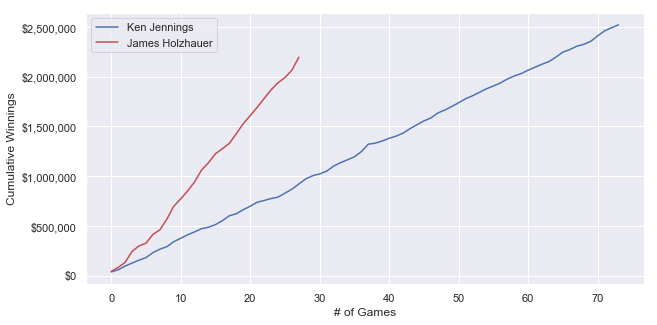

In [328]:
import matplotlib.ticker as ticker
sns.set(style="darkgrid")
ken_winnings = np.cumsum(ken_df['winnings'])
james_winnings = np.cumsum(james_df['winnings'])
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ken_winnings[:-1], c='b', label='Ken Jennings');
plt.plot(james_winnings, c='r', label='James Holzhauer');
plt.xlabel('# of Games')
plt.ylabel('Cumulative Winnings')

fmt = '${x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.legend();
